# ANOVA (Analsis de varianza)

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

Es el ratio entre la varianza de los grupos y el promedio de la varianza de dentro de los grupos

# f-test nos ayudara a evualar si las variables son estadisticamente significativas para una variable dependiente.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')

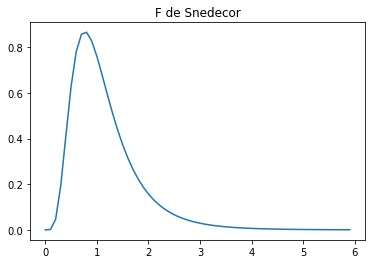

In [5]:
x=[i*.1 for i in range(60)]

plt.plot(x, f(15, 15).pdf(x))
plt.title('F de Snedecor');

# Supuestos

+ La variable dependiente debe ser **continua**
+ la variable dependiente se distribuye **normalmente** en cada grupo
+ Homogeneidad de varianza
+ las observaciones son independientes
+ **NO DEBEMOS TENER OUTLIERS**

# Ejemplo Plantas

**ANOVA One-Way** : Una variable independiente y una dependiente, similaridad basada en la media y en el f_score.


Supongamos que tenemos dos fertilizantes distintos y probamos su eficacia. Se tienen 3 grupos, el grupo de control (no se aplica fertilizante), y un grupo para cada uno de los fertilizantes.

Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3$  (no hay diferencia significativa entre los grupos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un grupo)

In [12]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [17]:
df = pd.read_csv('data/PlantGrowth.csv', index_col= 0)

In [22]:
grupos =df['group'].unique() 
grupos

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [20]:
df.head(8)

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl
7,5.17,ctrl
8,4.53,ctrl


In [37]:
df.weight[df.group =='ctrl' ]

1     4.17
2     5.58
3     5.18
4     6.11
5     4.50
6     4.61
7     5.17
8     4.53
9     5.33
10    5.14
Name: weight, dtype: float64

In [25]:
data={g:df.weight[df.group==g] for g in grupos}

data

{'ctrl': 1     4.17
 2     5.58
 3     5.18
 4     6.11
 5     4.50
 6     4.61
 7     5.17
 8     4.53
 9     5.33
 10    5.14
 Name: weight, dtype: float64,
 'trt1': 11    4.81
 12    4.17
 13    4.41
 14    3.59
 15    5.87
 16    3.83
 17    6.03
 18    4.89
 19    4.32
 20    4.69
 Name: weight, dtype: float64,
 'trt2': 21    6.31
 22    5.12
 23    5.54
 24    5.50
 25    5.37
 26    5.29
 27    4.92
 28    6.15
 29    5.80
 30    5.26
 Name: weight, dtype: float64}

In [34]:
# PAra el 95 % de confianza con un alpha de 0.05
# Se rechaza H0 por que el p_value es menor al aplha indicado

In [58]:
f_score, p_value = f_oneway(data['trt2'], data['ctrl'])

print (f_score, p_value)

4.554043294351827 0.04685138491157386


# Ejemplo Ciudades

Se tiene un rating de 6 ciudades diferentes.

Las hipótesis son:

$H0 : \mu_1=\ldots=\mu_6$  (no hay diferencia significativa entre las ciudades)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos una ciudad)

In [41]:
rate=pd.read_csv('data/rate_by_city.csv')

rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [42]:
rate.City.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [43]:
rate['city_count']=rate.groupby('City').cumcount()

rate.head()

,Rate,City,city_count
0,13.75,1,0
1,13.75,1,1
2,13.50,1,2
3,13.50,1,3
4,13.00,1,4


In [44]:
rate_pivot=rate.pivot(columns='City', values='Rate', index='city_count')
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [68]:
f, p = f_oneway(*[rate_pivot[i] for i in range(1, 7)])
p
#Al 99% de confianza podemos rechazar hipotesis nula, que es igualdad de medias.

0.001174551414504048

In [56]:
f_oneway(rate_pivot[rate_pivot.columns[0]],rate_pivot[rate_pivot.columns[0]])

F_onewayResult(statistic=0.0, pvalue=1.0)

# Para p-value se busca:

+ 99% - confianza se busca que p-value sea menor de 0.01 (alpha) para rechazar hipotesis nula

+ 95% - confianza se busca que p-value sea menor de 0.05 (alpha)para rechazar hipotesis nula

+ 90% - confianza se busca que p-value sea menor de 0.10 (alpha)para rechazar hipotesis nula

In [65]:
p = []
for i in range(len(rate_pivot.columns)-1):
    p.append(f_oneway(rate_pivot.iloc[:,i],rate_pivot.iloc[:,i+1]).pvalue)

In [66]:
p

[0.05336032220284218,
 0.03434494091740313,
 0.8692149917799985,
 0.5603256524164064,
 0.0004624250306693342]

In [ ]:
#1 != 2  en sus medias
#2 ! = 3 en sus medias 
#3 == 4 en sus medias
#4 == 5 en su medias
#5 != 6 en sus medias

# Ejemplo Campo


**ANOVA Two-Way** : Dos variables independientes categoricas y una dependiente continua.


Supongamos que se tienen datos de produccion de un campo, y ademas los datos del tipo de fertilizante y cantidad de agua usada.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no hay diferencia significativa entre campos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un campo)

In [69]:
df=pd.read_csv('data/crop_yield.csv')
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [71]:
df['Fert']

0     A
1     A
2     A
3     A
4     A
5     B
6     B
7     B
8     B
9     B
10    A
11    A
12    A
13    A
14    A
15    B
16    B
17    B
18    B
19    B
Name: Fert, dtype: object

In [73]:
df['Water']

0     High
1     High
2     High
3     High
4     High
5     High
6     High
7     High
8     High
9     High
10     Low
11     Low
12     Low
13     Low
14     Low
15     Low
16     Low
17     Low
18     Low
19     Low
Name: Water, dtype: object

In [220]:
modelo=ols('Yield ~ C(Fert)*C(Water)', df).fit()
#Nuestra variable a explicar es la produccion de maiz bajo diversos factores y ver si estos explican a la produccion


PatsyError: Error evaluating factor: NameError: name 'Yield' is not defined
    Yield ~ C(Fert)*C(Water)
    ^^^^^

In [82]:
res=sm.stats.anova_lm(modelo, typ=2)
res
#Vemos si son diferentes entre ellas si es asi, seran independientes por lo que son significativas para explicar a la
#variable dependiente

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.669070,0.029228
C(Water),63.368,1.0,5.191895,0.035887
Residual,207.488,17.0,NaN,NaN


In [85]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     5.430
Date:                Wed, 02 Sep 2020   Prob (F-statistic):             0.0150
Time:                        12:25:46   Log-Likelihood:                -51.772
No. Observations:                  20   AIC:                             109.5
Df Residuals:                      17   BIC:                             112.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.6800      1.353     24.153      0.000      29.825      35.535
C(Fert)[T.B]       -3.7200      1.562     -2.381      0.029      -7.016      -0.424
C(Water)[T.Low]    -3.5600      1.562     -2.279      0.036      -6.856      -0.264
==============================================================================
Omnibus:                        1.169   Durbin-Watson:                   2.736
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.820
Skew:                          -0.081   Prob(JB):                        0.664
Kurtosis:                       2.022   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#R-squared - Es el porcentaje en el cual se esta explicando el modelo, es decir si es bueno o es malo
#Mientras mas cerca sea de 99% sera mejor

# Regresion Lineal

**Ecuacion de la recta**

$$y = m·x+b$$

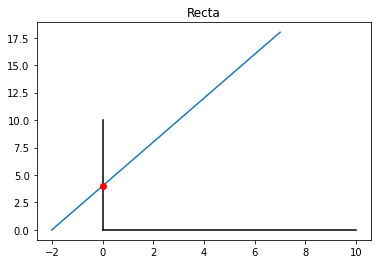

In [87]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

In [88]:
from scipy.stats import linregress

In [90]:
auto=pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [116]:
train = auto.loc[:300,['cylinders','horse_power']]
train

,cylinders,horse_power
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0
...,...,...
296,4,80.0
297,5,77.0
298,8,125.0
299,4,71.0


In [119]:
y = auto.loc[:300,['acceleration']]

In [121]:
train['y'] = y

In [122]:
train

,cylinders,horse_power,y
0,8,130.0,12.0
1,8,165.0,11.5
2,8,150.0,11.0
3,8,150.0,12.0
4,8,140.0,10.5
...,...,...,...
296,4,80.0,15.0
297,5,77.0,20.1
298,8,125.0,17.4
299,4,71.0,24.8


In [129]:
test = auto.loc[300:,['cylinders','horse_power']]

In [123]:
modelo = ols('y ~ (C(cylinders)*horse_power)', train).fit()

In [132]:
y_true = auto.loc[300:,['acceleration']]

In [131]:
y_test = modelo.predict(test)

In [136]:
y_true

,acceleration
300,22.2
301,13.2
302,14.9
303,19.2
304,14.7
...,...
393,15.6
394,24.6
395,11.6
396,18.6


In [144]:
y_test

,acceleration
300,15.928453
301,17.340143
302,17.340143
303,17.745236
304,17.421162
...,...
393,16.043845
394,18.798478
395,16.205883
396,16.610976


In [142]:
y_test = pd.DataFrame(y_test, columns=['acceleration'])

In [138]:
print(y_true.mean(),y_test.mean())

acceleration    16.504082
dtype: float64 16.781162039320932


In [143]:
print(y_true.std(),y_test.std())

acceleration    2.605146
dtype: float64 acceleration    1.169795
dtype: float64


In [124]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     42.46
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           6.17e-48
Time:                        13:13:24   Log-Likelihood:                -601.87
No. Observations:                 299   AIC:                             1224.
Df Residuals:                     289   BIC:                             1261.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        13.5000     12.752      1.059      0.291     -11.599      38.599
C(cylinders)[T.4]                 9.5114     12.782      0.744      0.457     -15.646      34.669
C(cylinders)[T.5]                19.0385     15.673      1.215      0.225     -11.810      49.886
C(cylinders)[T.6]                 8.4191     12.857      0.655      0.513     -16.886      33.724
C(cylinders)[T.8]                 6.3939     12.795      0.500      0.618     -18.790      31.578
horse_power                    6.965e-15      0.128   5.43e-14      1.000      -0.253       0.253
C(cylinders)[T.4]:horse_power    -0.0810      0.129     -0.629      0.530      -0.335       0.172
C(cylinders)[T.5]:horse_power    -0.1615      0.163     -0.992      0.322      -0.482       0.159
C(cylinders)[T.6]:horse_power    -0.0537      0.129     -0.415      0.678      -0.308       0.201
C(cylinders)[T.8]:horse_power    -0.0441      0.129     -0.343      0.732      -0.297       0.209
==============================================================================
Omnibus:                       40.399   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.138
Skew:                           0.743   Prob(JB):                     4.83e-17
Kurtosis:                       4.955   Cond. No.                     3.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
modelo = ols('acceleration ~ (C(cylinders)*horse_power)', auto).fit()
#acceleration = 'lacategoria de cylinders'*'caballos de fuerza'

In [118]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acceleration   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     45.90
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           1.38e-55
Time:                        13:10:50   Log-Likelihood:                -809.85
No. Observations:                 392   AIC:                             1640.
Df Residuals:                     382   BIC:                             1679.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        13.6100     13.389      1.017      0.310     -12.715      39.935
C(cylinders)[T.4]                 9.2241     13.410      0.688      0.492     -17.143      35.591
C(cylinders)[T.5]                15.0050     14.739      1.018      0.309     -13.975      43.985
C(cylinders)[T.6]                10.2881     13.476      0.763      0.446     -16.209      36.785
C(cylinders)[T.8]                 6.7014     13.433      0.499      0.618     -19.710      33.113
horse_power                      -0.0036      0.135     -0.027      0.979      -0.268       0.261
C(cylinders)[T.4]:horse_power    -0.0762      0.135     -0.565      0.572      -0.341       0.189
C(cylinders)[T.5]:horse_power    -0.1176      0.153     -0.767      0.444      -0.419       0.184
C(cylinders)[T.6]:horse_power    -0.0717      0.135     -0.529      0.597      -0.338       0.194
C(cylinders)[T.8]:horse_power    -0.0428      0.135     -0.318      0.751      -0.308       0.222
==============================================================================
Omnibus:                       34.411   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.444
Skew:                           0.621   Prob(JB):                     1.83e-11
Kurtosis:                       4.218   Cond. No.                     4.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
from scipy.stats import shapiro

In [147]:
shapiro(y) #Con saphiro la hipotesis nula, es decir aquella se esta planteada, dice que la variable
# se comporta como una normal, como el p_value es mayor a 0.1,0.5,0.01. no se rechaza hipotesis nula

ShapiroResult(statistic=0.9922876358032227, pvalue=0.12044399976730347)

# Ejemplo Housing

In [196]:
df = pd.read_csv('data/housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [197]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [198]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


{'whiskers': [<matplotlib.lines.Line2D at 0x2a4185c6848>,
 'caps': [<matplotlib.lines.Line2D at 0x2a418372e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a418372048>],
 'medians': [<matplotlib.lines.Line2D at 0x2a41837a9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a41837ac48>],
 'means': []}

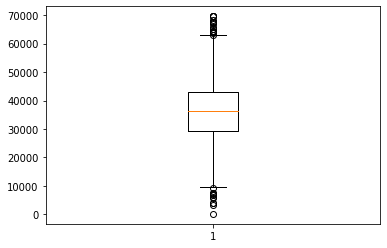

In [199]:
plt.boxplot(df['Area Population'])

In [200]:
quant_20 = df['Area Population'].quantile(0.20)
quant_80 = df['Area Population'].quantile(0.80)

In [201]:
df_2 = df[(df['Area Population'] >= quant_20) & (df['Area Population'] <= quant_80)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a41a610848>,
 'caps': [<matplotlib.lines.Line2D at 0x2a41a9f5f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a41a9f5908>],
 'medians': [<matplotlib.lines.Line2D at 0x2a41a81eb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a41a81e508>],
 'means': []}

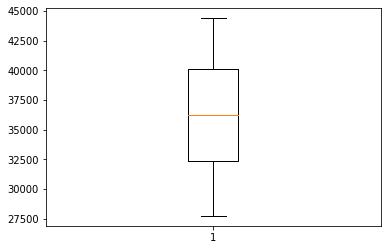

In [202]:
plt.boxplot(df_2['Area Population'])

In [203]:
df_2.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,68607.490870,5.977713,6.978458,4.002810,36143.982199,1.231739e+06
std,10599.783187,0.983757,1.005495,1.232755,4623.428041,3.302244e+05
min,37908.675863,2.797619,3.950225,2.000000,27721.393641,3.114052e+04
25%,61470.496877,5.323276,6.297549,3.150000,32312.725709,1.015863e+06
50%,68740.293014,5.966585,6.990668,4.060000,36199.406689,1.231994e+06
75%,75742.557222,6.632183,7.654167,4.500000,40081.126950,1.454151e+06
max,107701.748378,9.125283,10.280022,6.500000,44381.267536,2.469066e+06


In [204]:
quant_20_i = df_2['Avg. Area Income'].quantile(0.20)
quant_80_i = df_2['Avg. Area Income'].quantile(0.80)

In [205]:
df_2 = df_2[(df_2['Avg. Area Income'] >= quant_20_i) & (df_2['Avg. Area Income'] <= quant_80_i)]

In [206]:
df_2

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
13,73163.663441,6.919535,5.993188,2.27,32326.123139,1.291332e+06,"829 Welch Track Apt. 992\nNorth John, AR 26532..."
14,69391.380184,5.344776,8.406418,4.37,35521.294033,1.402818e+06,"PSC 5330, Box 4420\nAPO AP 08302"
...,...,...,...,...,...,...,...
4985,75117.042949,6.036275,6.538111,2.22,43976.031060,1.378938e+06,"PSC 7442, Box 6234\nAPO AP 13017"
4986,71060.406015,5.718839,7.222730,4.34,34814.585591,1.260241e+06,"5611 Matthew Avenue\nLake Kevin, FM 72963-8891"
4988,67637.840665,7.056673,5.774409,3.05,43846.531340,1.275143e+06,"6066 Sanders Court Apt. 914\nSouth Alexis, FM ..."
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."


In [207]:
df_2.reset_index(drop= True, inplace = True)

In [208]:
cols_x = df_2.columns
cols_x

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [209]:
list(cols_x[:-2])

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [212]:
df_2.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
1,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
2,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
3,73163.663441,6.919535,5.993188,2.27,32326.123139,1.291332e+06,"829 Welch Track Apt. 992\nNorth John, AR 26532..."
4,69391.380184,5.344776,8.406418,4.37,35521.294033,1.402818e+06,"PSC 5330, Box 4420\nAPO AP 08302"


In [210]:
import statsmodels.api as sm
x_train = df_2.loc[:1500,list(cols_x[:-2])]

In [211]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,61287.067179,5.865890,8.512727,5.13,36882.159400
1,63345.240046,7.188236,5.586729,3.26,34310.242831
2,59927.660813,5.362126,6.393121,2.30,29387.396003
3,73163.663441,6.919535,5.993188,2.27,32326.123139
4,69391.380184,5.344776,8.406418,4.37,35521.294033
...,...,...,...,...,...
1496,75245.465436,8.167820,7.420100,3.42,37410.669928
1497,62317.087353,4.333489,5.575276,4.18,36075.805794
1498,77481.708347,5.688243,6.463808,2.24,30735.595541
1499,75408.358621,5.035659,7.700190,4.02,33003.259847


In [215]:
y_train = df_2.loc[:1500,cols_x[-2]]
y_train

0       1.058988e+06
1       1.260617e+06
2       7.988695e+05
3       1.291332e+06
4       1.402818e+06
            ...     
1496    1.562887e+06
1497    6.853554e+05
1498    1.153680e+06
1499    1.235226e+06
1500    1.423126e+06
Name: Price, Length: 1501, dtype: float64

In [217]:
x_test = df_2.loc[1500:,list(cols_x[:-2])]
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1500,73739.847545,4.689009,8.244523,4.16,38988.127975
1501,69327.702459,7.533656,6.904156,4.34,31948.936594
1502,73294.461465,5.703093,5.734421,4.00,32253.018018
1503,60946.591116,7.210325,6.929553,2.17,39660.671298
1504,65480.306601,5.581043,6.690729,2.24,35056.751017
...,...,...,...,...,...
1795,75117.042949,6.036275,6.538111,2.22,43976.031060
1796,71060.406015,5.718839,7.222730,4.34,34814.585591
1797,67637.840665,7.056673,5.774409,3.05,43846.531340
1798,63390.686886,7.250591,4.805081,2.13,33266.145490


In [218]:
y_test = df_2.loc[1500:,cols_x[-2]]
y_test

1500    1.423126e+06
1501    1.550181e+06
1502    1.151129e+06
1503    1.420070e+06
1504    8.608044e+05
            ...     
1795    1.378938e+06
1796    1.260241e+06
1797    1.275143e+06
1798    1.030730e+06
1799    1.198657e+06
Name: Price, Length: 300, dtype: float64

In [222]:
modelo = sm.OLS(y_train,x_train).fit()

In [225]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.495e+04
Date:                Wed, 02 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:23:02   Log-Likelihood:                         -20259.
No. Observations:                1501   AIC:                                  4.053e+04
Df Residuals:                    1496   BIC:                                  4.055e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                -0.0282      0.604     -0.047      0.963      -1.213       1.157
Avg. Area House Age           1.155e+05   4358.795     26.502      0.000    1.07e+05    1.24e+05
Avg. Area Number of Rooms     6.649e+04   5051.828     13.161      0.000    5.66e+04    7.64e+04
Avg. Area Number of Bedrooms  5986.4979   4187.270      1.430      0.153   -2227.045    1.42e+04
Area Population                  1.7114      0.902      1.898      0.058      -0.057       3.480
==============================================================================
Omnibus:                        2.417   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                2.320
Skew:                          -0.049   Prob(JB):                        0.314
Kurtosis:                       2.834   Cond. No.                     9.86e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
y_pred =  modelo.predict(x_test)

In [246]:
pd.DataFrame(y_pred).describe()

,0
count,3.000000e+02
mean,1.238507e+06
std,1.311708e+05
min,8.166686e+05
25%,1.157172e+06
50%,1.233861e+06
75%,1.334303e+06
max,1.544347e+06


In [228]:
np.allclose(y_pred,y_test)

False

In [232]:
differencia = y_pred-y_test

In [235]:
differencia.mean()

10977.816038895953

In [236]:
differencia.std()

173252.83430932093

In [239]:
#H0 el precio de las casas es $1000000 
#H1 el precio es diferente de $1000000

In [240]:
sm.stats.ztest(y_pred, value = 1000000, alternative = "two-sided")

(31.493734592474436, 1.0583596709944745e-217)

In [250]:
sm.stats.ztest(y_pred, value = 1000000, alternative = "larger")
#los valores son mayores son que 1millon
#Como p_value es mucho menor al nivel de confianza del 95% con un alpha de 0.05 se rechaza hipotesis nula
#que en este caso la hipotesis es que los valores son menores a 1,000,000. Por lo tanto tomamos alternativa
#afrimando que los valores son mayores a 1,000,000

(31.493734592474436, 5.291798354972372e-218)

In [252]:
sm.stats.ztest(y_pred, value = 1000000, alternative = "smaller")

(31.493734592474436, 1.0)

In [257]:
y_sorted = y_pred.sort_values(ascending=True)

In [261]:
len(y_sorted[y_sorted <= 1000000])

11

In [ ]:
#los valores son menores son que 1millon

(array([ 1.,  5., 11., 29., 53., 66., 54., 47., 27.,  7.]),
 array([ 816668.60483541,  889436.48290937,  962204.36098333,
        1034972.23905729, 1107740.11713125, 1180507.99520521,
        1253275.87327918, 1326043.75135314, 1398811.6294271 ,
        1471579.50750106, 1544347.38557502]),
 <BarContainer object of 10 artists>)

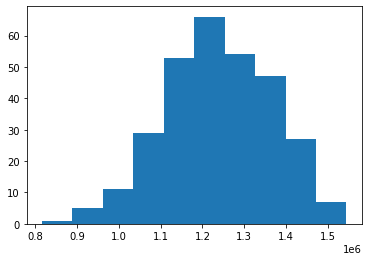

In [248]:
plt.hist(y_pred)

(array([ 10.,  48., 120., 270., 352., 333., 225., 108.,  31.,   4.]),
 array([ 437146.02035066,  600002.43474842,  762858.84914617,
         925715.26354393, 1088571.67794169, 1251428.09233945,
        1414284.50673721, 1577140.92113496, 1739997.33553272,
        1902853.74993048, 2065710.16432824]),
 <BarContainer object of 10 artists>)

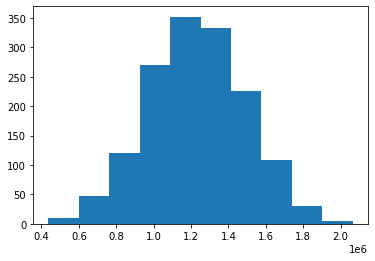

In [249]:
plt.hist(y_train)